<a href="https://colab.research.google.com/github/dikshabhati1/Unsupervised_country/blob/master/Unsupervised_country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving datasets_721951_1255613_Country-data.csv to datasets_721951_1255613_Country-data.csv


In [39]:
import pandas as pd
import io
#reading a csv file
df=pd.read_csv(io.BytesIO(uploaded['datasets_721951_1255613_Country-data.csv']))

In [3]:
uploaded1=files.upload()

Saving datasets_721951_1255613_data-dictionary.csv to datasets_721951_1255613_data-dictionary.csv


In [41]:
#reading a cvs file
df_dict=pd.read_csv(io.BytesIO(uploaded1['datasets_721951_1255613_data-dictionary.csv']))

In [42]:
#first few rows of df dataset
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [43]:
#number of unique countries
df['country'].nunique()

167

In [44]:
df['country'].value_counts()

Latvia        1
Belgium       1
Bolivia       1
Argentina     1
Nigeria       1
             ..
Azerbaijan    1
Belize        1
Bhutan        1
Indonesia     1
Haiti         1
Name: country, Length: 167, dtype: int64

In [45]:
#first few rows of df_dict dataset
df_dict.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [46]:
#drop country column
data=df.drop(['country'],axis=1)

In [47]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [48]:
#some basic info
df.info()
print(50*'-')
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  10 non-null     object
 1   Description  10 non-null     object
dtypes: object(2)
memory

**1**.*We can see that we have 167 rows and 10 colummns in our df dataset*

**2**.*We can see that we have 10 rows and 2 columns in our df_dict file*

**3**.*Thier is no missing value in df dataset*

**4**.*Only country column has object dtype.Other columns are either float or integer*

In [49]:
#some basic statistical data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [50]:
#null value 
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [51]:
#null value
df_dict.isnull().sum()

Column Name    0
Description    0
dtype: int64

*We can see that we do not have any null value*

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

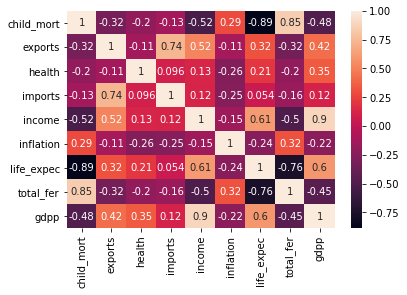

In [53]:
#correlation 
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

**1**.*From correlation heatmap we can see that the income and gdpp are highly correlated to each other.So we can drop income column.*
*But we have only few features and very small data we will not drop it*

**2**.*import and export are correlated to each other*

**3**.*gdpp and life_expec asre highly correlated to each other*

**4**.*child_mort and tota_fer are highly correlated to each other*

**5**.*chil_mort and life_expec are highly negative correlated*

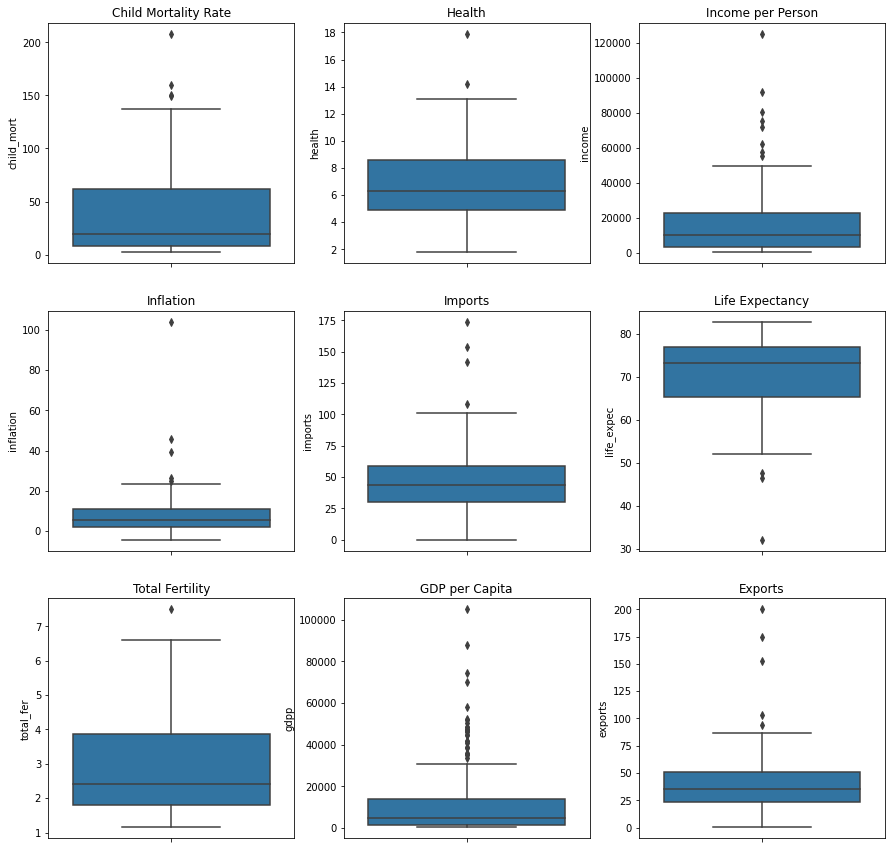

In [54]:
#box plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=df.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=df.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')
bp=sns.boxplot(y=df.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')
bp=sns.boxplot(y=df.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=df.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')
s=sns.boxplot(y=df.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=df.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=df.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=df.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()

**1**.*We can see that their are outliers in every column.*

**2**.*Their are so many outliers in gdpp and income column*

**3**.*Removing these outliers is not an great idea since we have a very small dataset and also some countries really have less gdp as compare to other and some people have really a great income*

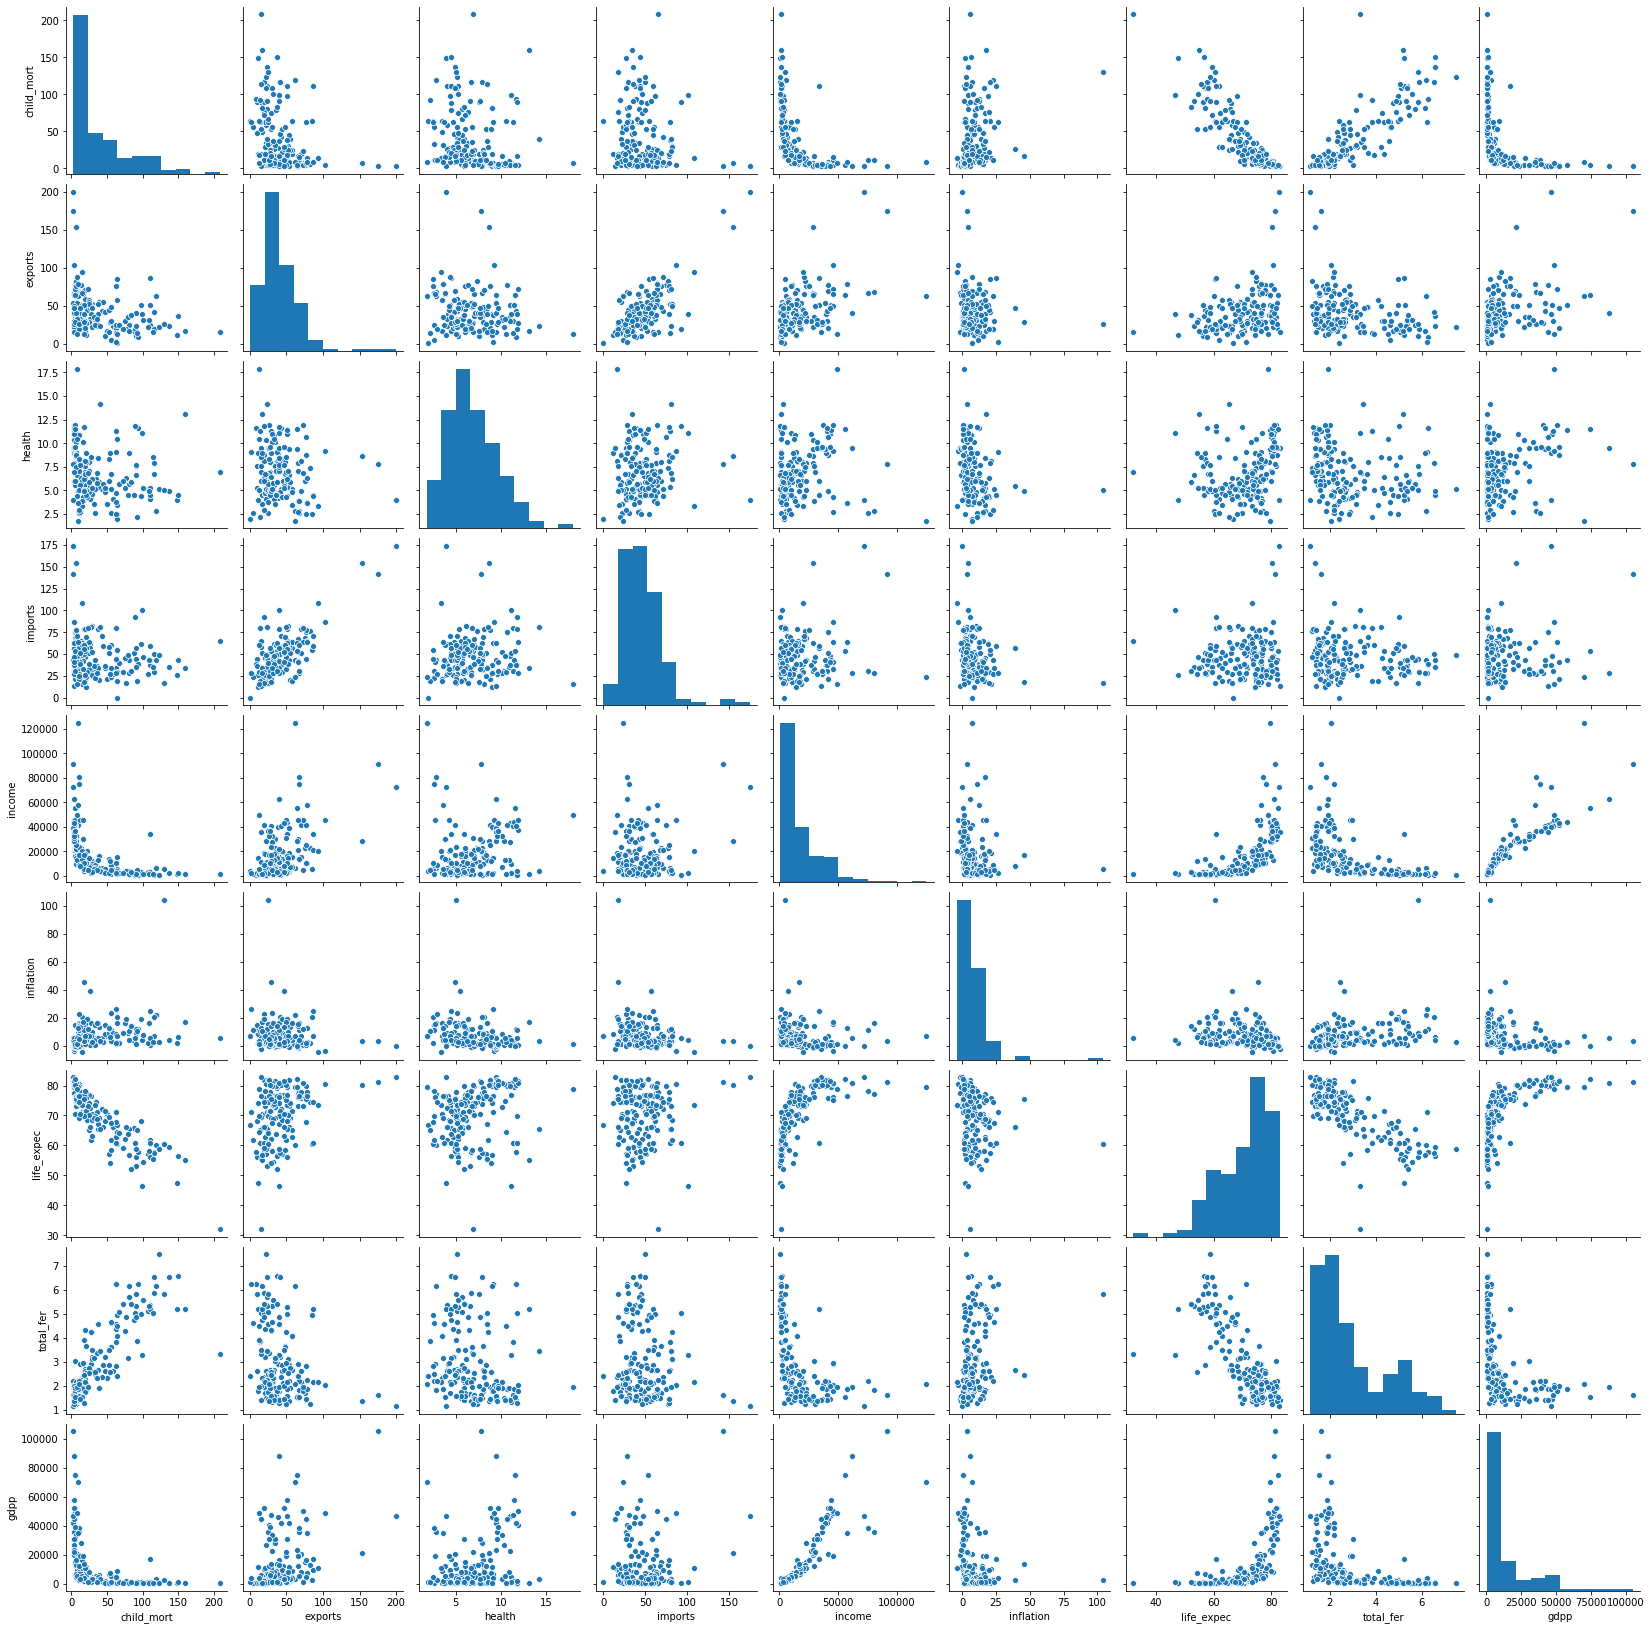

In [55]:
sns.pairplot(df)

In [56]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaled=scaling.fit_transform(data)

In [57]:
scaled_df=pd.DataFrame(scaled,columns=data.columns)

In [58]:
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


#K MEANS CLUSTERING AND ELBOW METHOD

In [59]:
from sklearn.cluster import KMeans
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data)
    a.append(kmean.inertia_) 

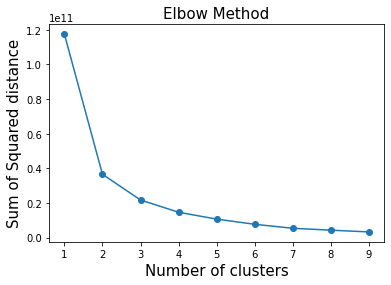

In [60]:
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

*We can see that the elbow is at 3.So,we can take number of cluster 3 for our k mean model*

In [61]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3,random_state = 111)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [62]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

1    84
0    47
2    36
dtype: int64

In [63]:
#calculate how good our model is
#calculate Silhouette Coefficient for K=3
from sklearn import metrics
metrics.silhouette_score(scaled_df, kmeans.labels_)

0.28329575683463126

In [64]:
#predicting values
cluster_labels = kmeans.fit_predict(scaled_df)

In [65]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


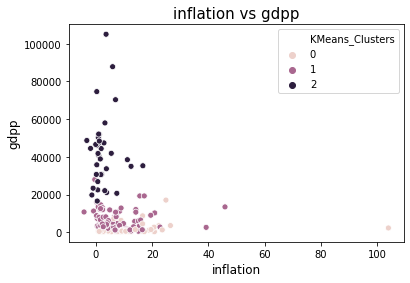

In [66]:
#visulization of clusters inflation vs gdpp
sns.scatterplot(kmeans_df['inflation'],kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

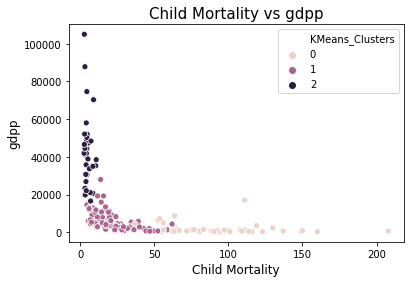

In [67]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(kmeans_df['child_mort'],kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

In [68]:
#save a kmeans file
kmeans_df.to_csv('kmeans_result.csv',index=False)

**1**.*Countries having high gdpp and low child mortality are Developed countries.*

**2**.*Countries having low gdpp and low child mortality are Developing countries*

**3**.*Countries having low gdpp and high child mortality are Under-developing countries*

**So we came to know that:**

*0-Under-Developing country*

*1-Developing country*

*2-Developed country*


In [89]:
#find number of developed country,developing country,under-developed country
under_developing=kmeans_df[kmeans_df['KMeans_Clusters']==0]['country']
developing=kmeans_df[kmeans_df['KMeans_Clusters']==1]['country']
developed=kmeans_df[kmeans_df['KMeans_Clusters']==2]['country']

print("Number of deveoped countries",len(under_developed))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(developed))

Number of deveoped countries 47
Number of developing countries 84
Number of under-developing countries 36


In [90]:
#list of developed countries
list(developed)

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [91]:
#list of developing countries
list(developing)

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Th

In [92]:
#list of under-developing countries
list(under_developing)

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

***Hierarchical clustering***

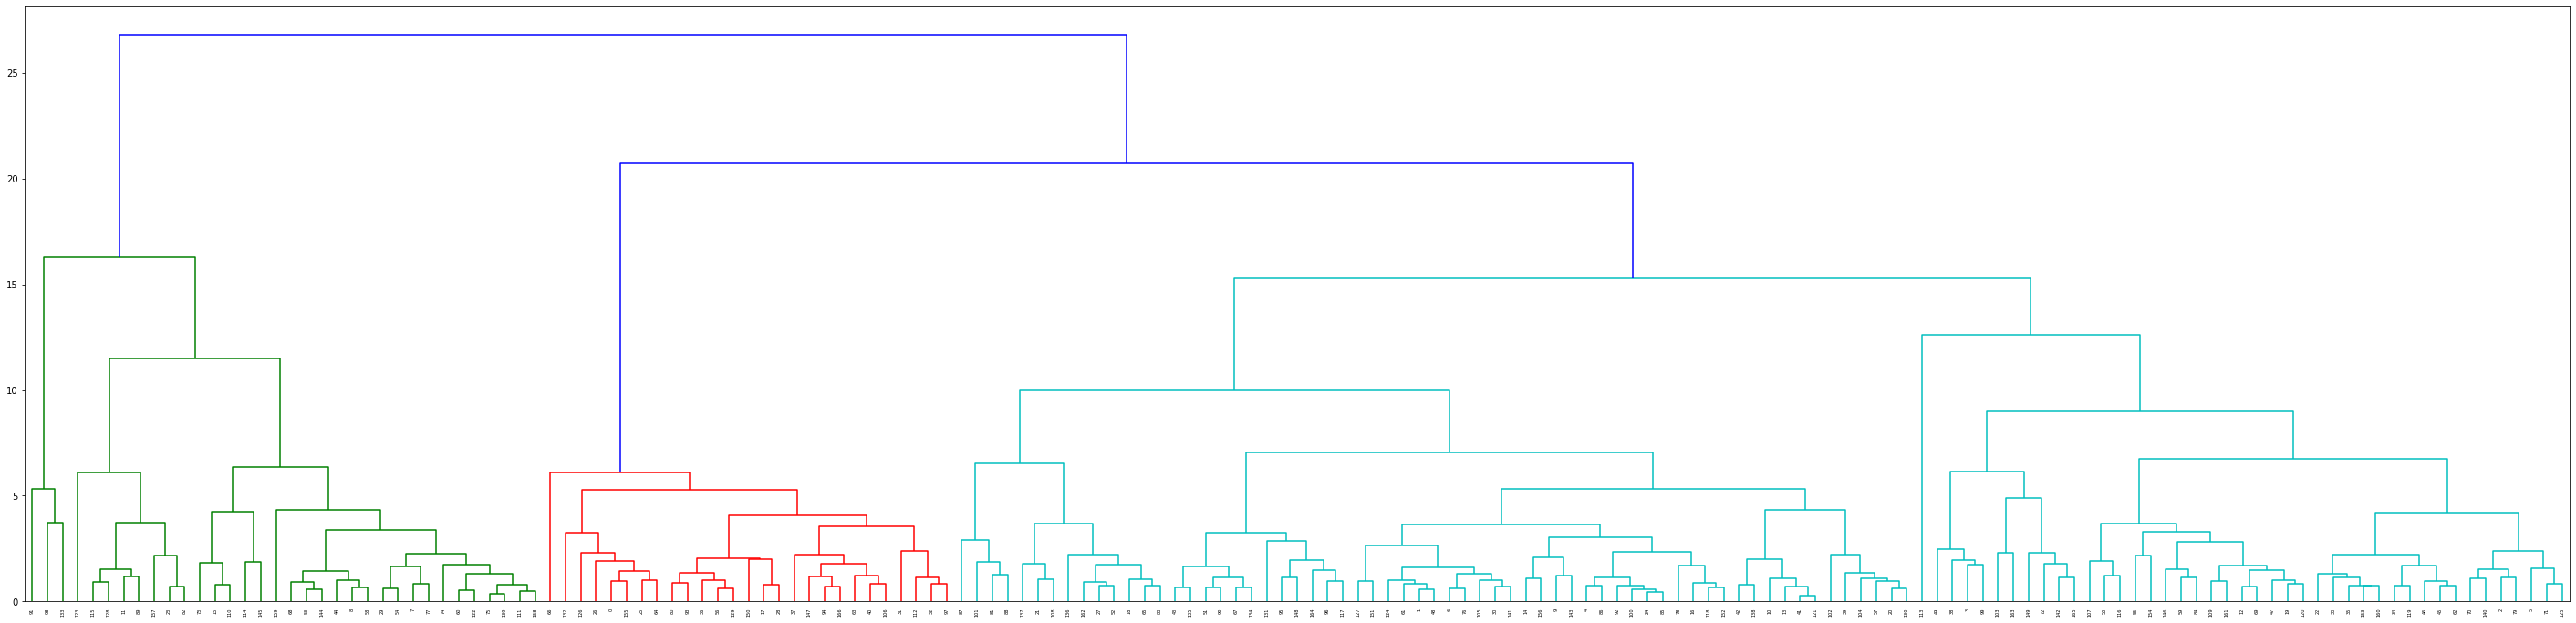

In [73]:
#plotting dendogram
import scipy.cluster.hierarchy as hcluster
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(scaled_df,method='ward'))

*let us choose number of cluster 3*

In [74]:
# Getting labels from Agglomearative Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(scaled_df)
hcluster_label = hcluster.labels_

In [75]:
hcluster_df = pd.DataFrame(df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1


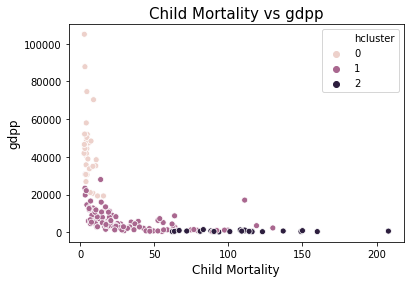

In [76]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(hcluster_df['child_mort'],hcluster_df['gdpp'],hue='hcluster',data=hcluster_df)
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

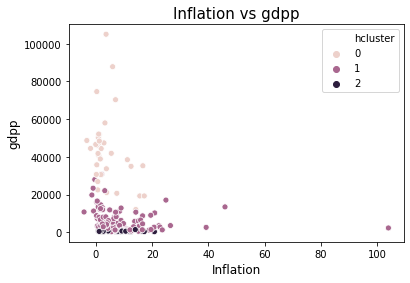

In [77]:
#visulazing hcluster results
sns.scatterplot(hcluster_df['inflation'],hcluster_df['gdpp'],hue='hcluster',data=hcluster_df)
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

In [78]:
#save a hcluster_df file
hcluster_df.to_csv('hcluster_result.csv',index=False)

In [80]:
#find number of developed country,developing country,under-developed country
developed=hcluster_df[hcluster_df['hcluster']==0]['country']
developing=hcluster_df[hcluster_df['hcluster']==1]['country']
under_developing=hcluster_df[hcluster_df['hcluster']==2]['country']

print("Number of deveoped countries",len(developed))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(under_developing))

Number of deveoped countries 34
Number of developing countries 106
Number of under-developing countries 27
